<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/kNN_hyperparameter_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-NN分類器におけるハイパパラメータの与える影響
以下で，k-NN 分類器のハイパパラメータである「近傍数」が正解率へ与える影響を考察する。

In [ ]:
'''
k-近傍法における近傍数の影響
'''
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# データの生成
X, y = make_classification(random_state=11,
                           n_samples=300,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=3)

# 訓練データとテストデータに分割 (学習:テスト=7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=12)

# モデルの構築 & 評価
log_k = []
log_score = []
for k in range(1, 16, 2):
    model = KNeighborsClassifier(n_neighbors=k) # モデルの定義
    model.fit(X_train, y_train) # 学習
    score = model.score(X_test, y_test) # 予測
    print("k={}, accuracy={:.2f}".format(k, score))
    log_k.append(k)
    log_score.append(score)

# 横軸 k, 縦軸 score の折れ線グラフを描画
plt.plot(log_k, log_score, marker='o')
plt.show()

---
## step-by-step によるコードの解説

### ライブラリのインポート
処理に必要となるライブラリをインポートする。 ここで用いるのは sciki-learn および matplotlib である。

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### データ生成 ＆ 学習データとテストデータへの分割

In [ ]:
# データの生成
X, y = make_classification(random_state=11,
                           n_samples=300,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=3)

# 訓練データとテストデータに分割 (学習:テスト=7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=12)

- `make_classification()` : scikit-learn に備えられている「正規分布に従う人工データ生成クラス」を利用して、データ生成を行う。ここでパラメータの意味は次のとおり：
    - `n_samples=300` : 生成されるサンプル数を 300個とする
    - `n_features=2` : 特徴空間の次元数を 2 とする
    - `n_classes=3` : クラス数を 3 クラスとする
    - その他のパラメータは，正規分布の大きさやクラス間の重なりの程度をコントロールするものである。
- `train_test_split(X, y, test_size=0.3,stratify=y, random_state=12)` : データセットを訓練用データとテスト用データに 7:3 で分割する。

### (参考) サンプルの分布状態の可視化
オリジナルのコードに含まれていないが，３クラスのデータがどの程度，分離されているか（重なっているか）を確認するため，可視化を行った。

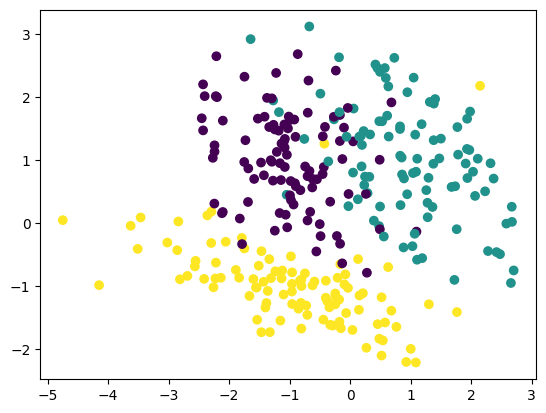

In [ ]:
# (参考) サンプルの分布状態の可視化
plt.scatter(X[:, 0], X[:, 1], c=y)

### モデルの定義・学習・評価
近傍数 k の値を 1, 3, 5, ..., 15 と変化させながら，k-NN分類器の定義，学習，予測を行っている。
また，得られた正解率は k の値とともに，変数 `log_k` と `log_score` へ記録される。

- `model.score(X_test, y_test)` : テストデータを与えて正解率を求める関数である。

In [ ]:
# モデルの構築 & 評価
log_k = []
log_score = []
for k in range(1, 16, 2):
    model = KNeighborsClassifier(n_neighbors=k) # モデルの定義
    model.fit(X_train, y_train) # 学習
    score = model.score(X_test, y_test) # 予測
    print("k={}, accuracy={:.2f}".format(k, score))
    log_k.append(k)
    log_score.append(score)

k=1, accuracy=0.86
k=3, accuracy=0.91
k=5, accuracy=0.93
k=7, accuracy=0.93
k=9, accuracy=0.92
k=11, accuracy=0.92
k=13, accuracy=0.91
k=15, accuracy=0.91


### k の値と正解率の関係を描画
折れ線グラフを描く。

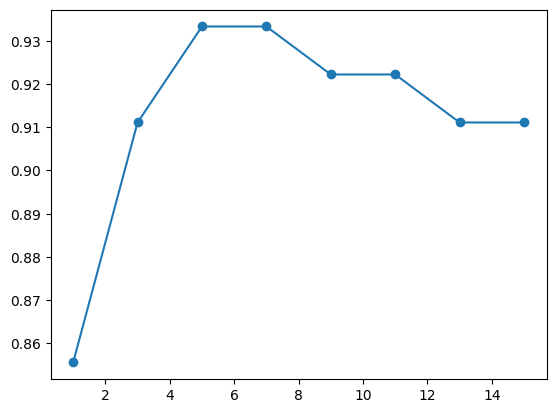

In [ ]:
# 横軸 k, 縦軸 score の折れ線グラフを描画
plt.plot(log_k, log_score, marker='o')
plt.show()